<a href="https://colab.research.google.com/github/RahmaMohamed-ai/Object-Detection-Model/blob/main/object_detection2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
#from sklearn.cross_validation import train_test_split
# Import tensorflow as the backend for Keras
from keras import backend as K
K.set_image_data_format('channels_first')
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
# from keras.optimizers import SGD,RMSprop,adam

from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
from keras.callbacks import TensorBoard
# Import required libraries for cnfusion matrix
from sklearn.metrics import classification_report,confusion_matrix
import itertools

import keras 
from keras.datasets import mnist
from keras.layers import Dense, Dropout, Flatten 
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import numpy as np
from tensorflow.keras.utils import to_categorical

In [ ]:
model = Sequential() 
model.add(Conv2D(32, kernel_size=(3, 3), 
    strides=(1,1),
    padding="same",
    activation='relu', 
    input_shape=(128,128,1)))

model.add(Conv2D(32, (3, 3),strides=(1,1),padding="same", activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
 
model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(128, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(7, activation='softmax'))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
! pip install kaggle

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/detection/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle kernels output pavansanagapati/simple-tutorial-on-object-recognition -p /path/to/dest

In [ ]:
%cd /content/drive/MyDrive/detection/

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/detection/"

In [ ]:
!kaggle datasets download -d pavansanagapati/images-dataset

In [ ]:
! unzip images-dataset

In [ ]:
# Define data path

data_dir_list = ['bike', 'cars','cats','dogs','flowers','horses','human']
data_dir_list

img_rows=128
img_cols=128
num_channel=1
num_epoch=100
# Define the number of classes
num_classes = 7
img_data_list=[]
for dataset in data_dir_list:
	img_list=os.listdir("/content/drive/MyDrive/detection/data"+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		input_img=cv2.imread("/content/drive/MyDrive/detection/data" + '/'+ dataset + '/'+ img )
		input_img=cv2.cvtColor(input_img, cv2.COLOR_BGR2GRAY)
		input_img_resize=cv2.resize(input_img,(128,128))
		img_data_list.append(input_img_resize)

img_data = np.array(img_data_list)
img_data = img_data.astype('float32')
img_data /= 255
print (img_data.shape)

Loaded the images of dataset-bike

Loaded the images of dataset-cars

Loaded the images of dataset-cats

Loaded the images of dataset-dogs

Loaded the images of dataset-flowers

Loaded the images of dataset-horses

Loaded the images of dataset-human

(1803, 128, 128)


In [ ]:
if num_channel==1:
	if K.set_image_data_format=='channels_first':
		img_data= np.expand_dims(img_data, axis=1) 
		print (img_data.shape)
	else:
		img_data= np.expand_dims(img_data, axis=3) 
		print (img_data.shape)
		
else:
	if K.image_dim_ordering()=='channels_first':
		img_data=np.rollaxis(img_data,3,1)
		print (img_data.shape)

In [ ]:
num_classes = 7
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')
labels[0:365]=0
labels[365:567]=1
labels[567:987]=2
labels[987:1189]=3
labels[1189:1399]=4
labels[1399:1601]=5
labels[1601:1803]=6
names = ['bike', 'cars', 'cats', 'dogs', 'flowers', 'horses', 'human']

In [ ]:
Y = np_utils.to_categorical(labels, num_classes)

In [ ]:
x,y = shuffle(img_data,Y, random_state=2)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [ ]:
print("X_train shape = {}".format(X_train.shape))
print("X_test shape = {}".format(X_test.shape))

In [ ]:
image = X_train[1203,:].reshape((128,128))
plt.imshow(image)
plt.show()

In [ ]:
model = Sequential() 
model.add(Conv2D(64, kernel_size=(3, 3), 
    strides=(1,1),
    padding="same",
    activation='relu', 
    input_shape=(128,128,1)))

model.add(Conv2D(64, (3, 3),strides=(1,1),padding="same", activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model.add(Conv2D(128, (3, 3),strides=(1,1),padding="same", activation='relu')) 
model.add(Conv2D(128, (3, 3),strides=(1,1),padding="same", activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
model.add(Conv2D(256, (3, 3),strides=(1,1),padding="same", activation='relu')) 
model.add(Conv2D(256, (3, 3),strides=(1,1),padding="same", activation='relu')) 
model.add(Conv2D(256, (3, 3),strides=(1,1),padding="same", activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2),padding="same"))
 
model.add(Flatten()) 
model.add(Dropout(0.5)) 
model.add(Dense(1024, activation='relu')) 
model.add(Dropout(0.5))
model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(7, activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 64, 128, 1)        73792     
                                                                 
 conv2d_29 (Conv2D)          (None, 64, 128, 1)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 64, 64, 1)        0         
 g2D)                                                            
                                                                 
 conv2d_30 (Conv2D)          (None, 128, 64, 1)        73856     
                                                                 
 conv2d_31 (Conv2D)          (None, 128, 64, 1)        147584    
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 128, 32, 1)       0         
 g2D)                                                 

In [ ]:
hist = model.fit(X_train, y_train, batch_size=32, epochs=100 ,verbose=1, validation_data=(X_test, y_test))


Epoch 1/100
46/46 [==============================] - 1s 30ms/step - loss: 1.7703 - accuracy: 0.2850 - val_loss: 1.7402 - val_accuracy: 0.3130
Epoch 2/100
46/46 [==============================] - 1s 26ms/step - loss: 1.7538 - accuracy: 0.2788 - val_loss: 1.7341 - val_accuracy: 0.3213
Epoch 3/100
46/46 [==============================] - 1s 27ms/step - loss: 1.7339 - accuracy: 0.2809 - val_loss: 1.7326 - val_accuracy: 0.2659
Epoch 4/100
46/46 [==============================] - 1s 26ms/step - loss: 1.7538 - accuracy: 0.2968 - val_loss: 1.7311 - val_accuracy: 0.3269
Epoch 5/100
46/46 [==============================] - 1s 27ms/step - loss: 1.7020 - accuracy: 0.3211 - val_loss: 1.6889 - val_accuracy: 0.3518
Epoch 6/100
46/46 [==============================] - 1s 27ms/step - loss: 1.6711 - accuracy: 0.3329 - val_loss: 1.7522 - val_accuracy: 0.2964
Epoch 7/100
46/46 [==============================] - 1s 26ms/step - loss: 1.6957 - accuracy: 0.3121 - val_loss: 1.7271 - val_accuracy: 0.3269
Epoch 

Text(0, 0.5, 'Loss')

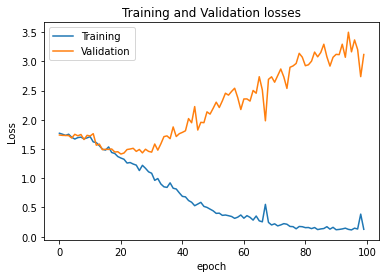

In [ ]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation losses')
plt.xlabel('epoch')
plt.ylabel('Loss')
# plt.ylim([0,1])

Text(0, 0.5, 'accuracy')

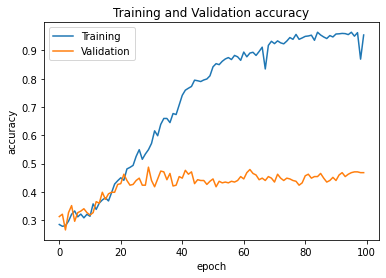

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Training', 'Validation'])
plt.title('Training and Validation accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
# plt.ylim([0,1])